In [12]:
import pandas as pd
import numpy as np
import utils.colonflag.feature_generation as fg
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LogisticRegression
import utils.missing_data as md

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, average_precision_score, f1_score, classification_report, precision_score, recall_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline

# Feature Engineering Model

In [13]:
dir = r"C:\Users\victo\OneDrive - University of Leeds\Documents\Uni Work\Project\MIMIC Work\Liver Cancer Prediction\liver_pred\data\interim"
#processed_labs = pd.read_csv(dir + r"\processed_lab_data.csv", parse_dates=["charttime", "index_date"], index_col=0)
cohort_ids = pd.read_csv(dir + r"\matched_cohort_ids.csv", index_col=0)
processed_labs = pd.read_csv(dir + r"\processed_lab_data.csv", parse_dates=["charttime", "index_date"], index_col=0)

In [14]:
processed_labs.head()

,subject_id,index_admission,test_admission,itemid,valuenum,valueuom,flag,charttime,outcome,index_date,label,fluid
0,10000980,25242409,NaN,50861,31.0,IU/L,NaN,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Alanine Aminotransferase (ALT),Blood
1,10000980,25242409,NaN,50868,13.0,mEq/L,NaN,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Anion Gap,Blood
2,10000980,25242409,NaN,50878,32.0,IU/L,NaN,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Asparate Aminotransferase (AST),Blood
3,10000980,25242409,NaN,50882,24.0,mEq/L,NaN,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Bicarbonate,Blood
4,10000980,25242409,NaN,50902,110.0,mEq/L,abnormal,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Chloride,Blood


In [17]:
current_df = fg.current_bloods_df(processed_labs, lead_time=21, n_days_pre=3, n_days_post=1)
historical_df = fg.historical_labs(processed_labs, n_days=21)

In [18]:
current_df['nulls'] = current_df.isnull().sum(axis=1)

In [19]:
100*sum(current_df['nulls']==53)/len(current_df)

3.185840707964602

In [20]:
current_df.head()

label,subject_id,Blood Alanine Aminotransferase (ALT),Blood Albumin,Blood Alkaline Phosphatase,Blood Anion Gap,Blood Asparate Aminotransferase (AST),Blood Basophils,Blood Bicarbonate,"Blood Bilirubin, Total","Blood Calcium, Total",...,Blood Green Top Hold (plasma),Urine Bilirubin,Urine Blood,Urine Leukocytes,Urine Nitrite,Urine Urine Appearance,Urine Urine Color,Urine Yeast,outcome,nulls
0,10006029,24.0,4.0,148.0,9.0,23.0,0.300000,23.0,0.4,9.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,25
1,10030549,12.5,NaN,165.5,11.5,13.0,0.333333,26.0,0.2,9.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18
2,10048244,20.0,3.5,77.0,16.0,19.0,NaN,24.0,0.2,8.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29
3,10052992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,42
4,10151324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,53


In [21]:
historical_df.head()

,subject_id,index_admission,test_admission,itemid,valuenum,valueuom,flag,charttime,outcome,index_date,label,fluid,pseudo_index
0,10000980,25242409,NaN,50861,31.0,IU/L,NaN,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Alanine Aminotransferase (ALT),Blood,2191-03-13 18:48:00
1,10000980,25242409,NaN,50868,13.0,mEq/L,NaN,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Anion Gap,Blood,2191-03-13 18:48:00
2,10000980,25242409,NaN,50878,32.0,IU/L,NaN,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Asparate Aminotransferase (AST),Blood,2191-03-13 18:48:00
3,10000980,25242409,NaN,50882,24.0,mEq/L,NaN,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Bicarbonate,Blood,2191-03-13 18:48:00
4,10000980,25242409,NaN,50902,110.0,mEq/L,abnormal,2185-09-17 12:10:00,False,2191-04-03 18:48:00,Blood Chloride,Blood,2191-03-13 18:48:00


In [22]:
current_df, historical_df, feature_df = fg.generate_features(processed_labs, cohort_ids, current_window_preindex=35, current_window_postindex=-21, historical_window=35)

Ref range missing: Urine Bacteria
Ref range missing: Urine Epithelial Cells
Ref range missing: Urine Length of Urine Collection
Ref range missing: Blood Estimated GFR (MDRD equation)
Ref range missing: Blood Green Top Hold (plasma)
Ref range missing: Urine Bilirubin
Ref range missing: Urine Blood
Ref range missing: Urine Leukocytes
Ref range missing: Urine Nitrite
Ref range missing: Urine Urine Appearance
Ref range missing: Urine Urine Color
Ref range missing: Urine Yeast


Removed 3148 subject_ids from current_labs and historical_labs
Removed 598 positive outcomes from current_labs


In [1]:
all_na_columns = feature_df.columns[feature_df.isna().sum()>len(feature_df)*0.8]
feature_df = feature_df.drop(columns=all_na_columns)
zero_mask = (feature_df == 0.0)
#all_zero_columns = feature_df.columns[zero_mask.sum()>len(feature_df)*0.8]
#all_zero_columns

NameError: name 'feature_df' is not defined

In [ ]:
feature_df.isna().sum().sort_values(ascending=False).head(10)

In [ ]:
feng_y = nas_removed['outcome']
feng_X = nas_removed.drop(columns=["outcome","subject_id"])

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(feng_X, feng_y, train_size = 0.8)
print(f"Train Length: {len(X_train)}        Train cases: {len(y_train[y_train==1])}    Proportion: {len(y_train[y_train==1])/len(y_train)*100} %")
print(f"Test Length: {len(X_test)}          Test cases: {len(y_test[y_test==1])}       Proportion: {len(y_test[y_test==1])/len(y_test)*100} %")

In [ ]:
#### Scale training #####
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled = X_train_scaled.set_axis(X_train.columns,axis=1)

#### Scale Test using training scaler ####
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.set_axis(X_test.columns,axis=1)


In [ ]:
X_train

In [ ]:
param_grid_boost = {'max_depth': [2,5,15],
    'max_features': [20,26,30],
    'min_samples_leaf': [10,50],
    'min_samples_split': [4,50],
    'n_estimators': [200, 500]
}

In [ ]:
boost = GradientBoostingClassifier()

gradboost = GridSearchCV(estimator = boost, param_grid = param_grid_boost,
                         cv = 5, verbose = 2, scoring='average_precision')
gradboost.fit(X_train_scaled, y_train)

In [ ]:
gradboost.best_params_

In [ ]:
gb_preds = gradboost.predict(X_train_scaled)
accuracy = sum(gb_preds==y_train)/len(gb_preds)
auc = roc_auc_score(y_train, gb_preds)
aps = average_precision_score(y_train, gb_preds)
f1 = f1_score(y_train, gb_preds)
print('Training Accuracy:', accuracy)
print('Training AUC:', auc)
print('Training Average Precision Score:', aps)
print('Training F1 Score:', f1)


gb_conf = confusion_matrix(y_train, gb_preds)
gb_disp = ConfusionMatrixDisplay(gb_conf)
gb_disp.plot()
plt.title('Train Confusion Matrix')
plt.show()

gb_preds = gradboost.predict(X_test_scaled)
accuracy = sum(gb_preds==y_test)/len(gb_preds)
auc = roc_auc_score(y_test, gb_preds)
aps = average_precision_score(y_test, gb_preds)
f1 = f1_score(y_test, gb_preds)
#precision = 

print('Classification Report:')
print(classification_report(y_test, gb_preds))
print('Test Accuracy:', accuracy)
print('Test AUC:', auc)
print('Test Average Precision Score:', aps)
print('Test F1 Score:', f1)


gb_conf = confusion_matrix(y_test, gb_preds)
gb_disp = ConfusionMatrixDisplay(gb_conf)
gb_disp.plot()
plt.title('GBDT Confusion Matrix')
plt.show()

# CNN Models

In [ ]:
import torch
torch.set_default_dtype(torch.float32)
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import pandas as pd
from torchvision import transforms
from sklearn.metrics import precision_score, average_precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix

## Data Preparation

In [ ]:
X, y  = fg.create_array_for_CNN(processed_labs, -4, 100)

In [ ]:
len(X)

In [ ]:
np.save(dir+'CNN_input.npy', X)
np.save(dir+'CNN_output.npy', y)
print("files saved successfully.")

In [ ]:
class NpyDataset(Dataset):
    def __init__(self, file_path,labels_file_path):
        self.data = np.load(file_path)
        self.labels = np.load(labels_file_path)
        self.dtype = torch.float32
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        # Assuming you have labels for each sample
        label = self.labels[idx]# You should adjust this to fetch labels if available
        label = torch.tensor([label], dtype=self.dtype)
        sample = torch.tensor(sample, dtype=self.dtype)
        sample = torch.unsqueeze(sample, dim=0) 

        return sample, label



In [ ]:
# File path to the .npy file
file_path = dir+'CNN_input.npy'
labels_file_path = dir+'CNN_output.npy'
# Create a dataset
dataset = NpyDataset(file_path, labels_file_path)

# Create a DataLoader to load the dataset
batch_size = 32
shuffle = True  # You can set it to True if you want to shuffle the data
num_workers = 0  # Number of subprocesses to use for data loading (0 means the data will be loaded in the main process)
#dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

# Split the dataset indices into training and testing sets
train_size = int(0.7 * len(dataset))  # 80% for training, adjust ratio as needed
test_size = int(0.2 * len(dataset))  # 20% for testing, adjust ratio as needed
val_size = len(dataset)-(train_size+test_size)   # 10% of the training data for validation
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size,val_size, test_size])

# Create separate DataLoaders for training and testing
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
# Compute the mean and standard deviation of the dataset
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

for data, _ in train_dataloader:
    total_samples += data.size(0)
    mean_sum += data.mean(dim=(0, 1, 3))  # Calculate mean along batch (0), width (2), and height (3) axes
    std_sum += torch.std(data, dim=(0, 1, 3))  # Calculate std along batch (0), width (2), and height (3) axes
mean = mean_sum / total_samples    
std = std_sum / total_samples

custom_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert data to PyTorch tensor
    #nan,  # Handle NaN values
    transforms.Normalize(mean=[mean], std=[std]),  # Normalize data using computed mean and std
    
])
train_dataloader.transform = custom_transform
test_dataloader.transform = custom_transform
val_dataloader.transform = custom_transform





In [ ]:
w1 = len(dataset)/(2*sum(dataset.labels == 0))
w2 = torch.tensor(len(dataset)/(2*sum(dataset.labels == 1)))
weights = torch.tensor([w1,w2], dtype=torch.float32)


In [ ]:
weights[1]

In [ ]:
# Initialize your CNN
cnn = SimpleCNN()

# Define your loss function and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([w2]), reduction='mean')
optimizer = optim.Adam(cnn.parameters(), lr=1e-6, weight_decay=1e-5)
num_epochs = 50
# Initialize the best validation loss to positive infinity
best_val_loss = float('inf')
training_losses = []
validation_losses = []
# Assuming your input data is in the form of a PyTorch tensor
# Here's how you can train your CNN
for epoch in range(num_epochs):
    # Create a progress bar
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
    running_loss = 0.0
    
    cnn.train()

    # Iterate over the dataset
    for inputs, labels in progress_bar:
        optimizer.zero_grad()
        outputs = cnn(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
        # Update the progress bar with the current loss
        progress_bar.set_postfix({'loss': running_loss / len(progress_bar)})
    
    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataloader)
    training_losses.append(epoch_loss)
    # Validation phase
    cnn.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    
    # Calculate average validation loss for the epoch
    epoch_val_loss = running_val_loss / len(val_dataloader)
    validation_losses.append(epoch_val_loss)
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(cnn.state_dict(), dir+'/model.pth')
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {epoch_loss:.4f}', 'Validation Loss:', epoch_val_loss)


In [ ]:
# Function to compute evaluation metrics
def evaluate_performance(dataloader):
    cnn.load_state_dict(torch.load(dir+'/model.pth'))  # Load the best model
    cnn.eval()  # Set the model to evaluation mode
    total_correct = 0
    total_samples = 0
    predicted_labels = []
    true_labels = []

    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in dataloader:
            outputs = cnn(inputs)
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predicted = (probabilities > 0.5).int()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predicted_labels.extend(predicted.numpy())
            true_labels.extend(labels.numpy())

    # Compute accuracy
    accuracy = total_correct / total_samples

    # Compute precision and recall
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    return accuracy, precision, recall, conf_matrix

# Evaluate performance on training dataset
train_accuracy, train_precision, train_recall, train_conf_matrix = evaluate_performance(train_dataloader)

# Evaluate performance on test dataset
test_accuracy, test_precision, test_recall, test_conf_matrix = evaluate_performance(test_dataloader)

print('Training Performance:')
print(f'Accuracy: {train_accuracy:.2%}')
print(f'Precision: {train_precision:.2f}')
print(f'Recall: {train_recall:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)

print('\nTest Performance:')
print(f'Accuracy: {test_accuracy:.2%}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)


In [ ]:
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
X[0].shape

## 1D kernel

In [ ]:
class onedCNN(nn.Module):
    def __init__(self):
        super(onedCNN, self).__init__()
        # Define your convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(1,3), padding=1)
        # (input_size - kernel_size + 2*padding)/stride + 1
        # (100 - 3 + 2*1)/1 + 1 = 100
        # (54 - 1 +2*1)/1 + 1 = 56
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,3), padding=1)
        # 50 - 3 + 2*1)/1 + 1 = 50
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(1,3), padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1,2), padding=1)
        # Define your fully connected layers

        self.fc1 = nn.Linear(128* 6 * 6, 64)
        self.fc2 = nn.Linear(64, 1)  # Assuming you have 2 classes

        self.dropout = nn.Dropout(0.6)
    def forward(self, x):
        # Input x has shape (batch_size, channels, height, width)
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, kernel_size=(1,2), stride=2)

        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, kernel_size=(1,2), stride=2)
      
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, kernel_size=(1,2), stride=2)
       
        x = self.conv4(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, kernel_size=(1,2), stride=2)
        # Flatten the output for the fully connected layers
        x = x.view(x.size(0), -1) # x.size(0) is the batch size
        
        x = self.dropout(x)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [ ]:
# Initialize your CNN
cnn = onedCNN()

best_val_loss = float('inf')

# Define your loss function and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=w2,  reduction='mean')
optimizer = optim.Adam(cnn.parameters(), lr=0.00001, weight_decay=1e-5)
num_epochs = 100

training_losses = []
val_losses = []
# Assuming your input data is in the form of a PyTorch tensor
# Here's how you can train your CNN
for epoch in range(num_epochs):
    # Create a progress bar
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
    running_loss = 0.0
    
    # Iterate over the dataset
    for inputs, labels in progress_bar:
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
        # Update the progress bar with the current loss
        progress_bar.set_postfix({'loss': running_loss / len(progress_bar)})
    
    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataloader)
    training_losses.append(epoch_loss)
    # Validation phase
    cnn.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    
    # Calculate average validation loss for the epoch
    epoch_val_loss = running_val_loss / len(val_dataloader)
    val_losses.append(epoch_val_loss)
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(cnn.state_dict(), dir+'/1d_model.pth')
    
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {epoch_loss:.4f}', 'Validation Loss:', epoch_val_loss)


In [ ]:

# Function to compute evaluation metrics
def evaluate_cnn_performance(dataloader):
    cnn.load_state_dict(torch.load(dir+'/1d_model.pth'))  # Load the best model
    cnn.eval()  # Set the model to evaluation mode
    total_correct = 0
    total_samples = 0
    predicted_labels = []
    true_labels = []
    all_probabilities = []
    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in dataloader:
            outputs = cnn(inputs)
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predicted = (probabilities > 0.5).int()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predicted_labels.extend(predicted.numpy())
            true_labels.extend(labels.numpy())
            all_probabilities.extend(probabilities.numpy())

    # Compute accuracy
    accuracy = total_correct / total_samples

    # Compute precision and recall
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # calculate false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(true_labels, all_probabilities)
    # Calculate AUROC
    auroc = roc_auc_score(true_labels, all_probabilities)

   
    # plot ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    #plt.show()

    return accuracy, precision, recall, conf_matrix, auroc

# Evaluate performance on training dataset
train_accuracy, train_precision, train_recall, train_conf_matrix, auroc = evaluate_performance(train_dataloader)

# Evaluate performance on test dataset
test_accuracy, test_precision, test_recall, test_conf_matrix, auroc = evaluate_performance(test_dataloader)

print('Training Performance:')
print(f'Accuracy: {train_accuracy:.2%}')
print(f'AUROC: {auroc:.2f}')
print(f'Precision: {train_precision:.2f}')
print(f'Recall: {train_recall:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)

print('\nTest Performance:')
print(f'Accuracy: {test_accuracy:.2%}')
print(f'AUROC: {auroc:.2f}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)


In [ ]:
plt.plot(training_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()

# 1d conv layers

In [ ]:
# reshape so that each patient has 54 channels of 1d time series data
num_patients = X.shape[0]
num_tests = X.shape[1]
num_timesteps = X.shape[2]
reshaped_array = X.reshape(num_patients, num_tests, num_timesteps)

reshaped_array = np.transpose(reshaped_array, (0, 2, 1))

np.save(dir+'CNN_1d_input.npy', X)
np.save(dir+'CNN_1d_output.npy', y)
print("files saved successfully.")

In [ ]:
# same as before except without the unsqueeze to show 1 channel
class OneD_Dataset(Dataset):
    def __init__(self, file_path,labels_file_path):
        self.data = np.load(file_path)
        self.labels = np.load(labels_file_path)
        self.dtype = torch.float32
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        # Assuming you have labels for each sample
        label = self.labels[idx]# You should adjust this to fetch labels if available
        label = torch.tensor([label], dtype=self.dtype)
        sample = torch.tensor(sample, dtype=self.dtype)
        

        return sample, label


In [ ]:
# File path to the .npy file
file_path_1d = dir+'CNN_1d_input.npy'
labels_file_path_1d = dir+'CNN_1d_output.npy'
# Create a dataset
dataset_1d = OneD_Dataset(file_path_1d, labels_file_path_1d)

# Create a DataLoader to load the dataset
batch_size = 100
shuffle = True  # You can set it to True if you want to shuffle the data
num_workers = 0  # Number of subprocesses to use for data loading (0 means the data will be loaded in the main process)
#dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

# Split the dataset indices into training and testing sets
train_size = int(0.7 * len(dataset))  # 80% for training, adjust ratio as needed
test_size = int(0.2 * len(dataset))  # 20% for testing, adjust ratio as needed
val_size = len(dataset)-(train_size+test_size)   # 10% of the training data for validation
train_dataset_1d, val_dataset_1d, test_dataset_1d = torch.utils.data.random_split(dataset_1d, [train_size,val_size, test_size])

# Create separate DataLoaders for training and testing
train_dataloader_1d = DataLoader(train_dataset_1d, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
test_dataloader_1d = DataLoader(test_dataset_1d, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
val_dataloader_1d = DataLoader(val_dataset_1d, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
# Compute the mean and standard deviation of the dataset
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

for data, _ in train_dataloader:
    total_samples += data.size(0)
    mean_sum += data.mean(dim=(0, 1))  # Calculate mean along batch (0), width (2), and height (3) axes
    std_sum += torch.std(data, dim=(0, 1))  # Calculate std along batch (0), width (2), and height (3) axes
mean = mean_sum / total_samples    
std = std_sum / total_samples

custom_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert data to PyTorch tensor
    #nan,  # Handle NaN values
    transforms.Normalize(mean=[mean], std=[std]),  # Normalize data using computed mean and std
    
])
train_dataloader_1d.transform = custom_transform
test_dataloader_1d.transform = custom_transform
val_dataloader_1d.transform = custom_transform

In [ ]:
data.shape

In [ ]:
class onedCNN2(nn.Module):
    def __init__(self):
        super(onedCNN2, self).__init__()
        # Define your convolutional layers
        self.conv1 = nn.Conv1d(in_channels=54, out_channels=108, kernel_size=3)
        # (input_size - kernel_size + 2*padding)/stride + 1
        # (100 - 3 + 2*1)/1 + 1 = 100
        # (54 - 1 +2*1)/1 + 1 = 56
        self.conv2 = nn.Conv1d(in_channels=108, out_channels=216, kernel_size=3, padding=1)
        # 50 - 3 + 2*1)/1 + 1 = 50
        self.conv3 = nn.Conv1d(in_channels=216, out_channels=216, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(in_channels=216, out_channels=432, kernel_size=2, padding=1)
        # Define your fully connected layers

        self.fc1 = nn.Linear(432* 7, 64)
        self.fc2 = nn.Linear(64, 1)  # Assuming you have 2 classes

        self.dropout = nn.Dropout(0.6)
    def forward(self, x):
        # Input x has shape (batch_size, channels, height, width)
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=2, stride=2)
        
        
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=2, stride=2)
        
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=2, stride=2)
        
        
        x = self.conv4(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, kernel_size=1, stride=2)
        
        # Flatten the output for the fully connected layers
        x = x.view(x.size(0), -1) # x.size(0) is the batch size

        x = self.dropout(x)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [ ]:
# Initialize your CNN
cnn = onedCNN2()

best_val_loss = float('inf')

# Define your loss function and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=w2,  reduction='mean')
unweighted_criterion = nn.BCEWithLogitsLoss(reduction='mean')
optimizer = optim.Adam(cnn.parameters(), lr=0.00001, weight_decay=1e-5)
num_epochs = 100

training_losses = []
val_losses = []
# Assuming your input data is in the form of a PyTorch tensor
# Here's how you can train your CNN
for epoch in range(num_epochs):
    # Create a progress bar
    progress_bar = tqdm(train_dataloader_1d, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
    running_loss = 0.0
    
    # Iterate over the dataset
    for inputs, labels in progress_bar:
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
        # Update the progress bar with the current loss
        progress_bar.set_postfix({'loss': running_loss / len(progress_bar)})
    
    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataloader_1d)
    training_losses.append(epoch_loss)
    # Validation phase
    cnn.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_dataloader_1d:
            outputs = cnn(inputs)
            loss = unweighted_criterion(outputs, labels)
            running_val_loss += loss.item()
    
    # Calculate average validation loss for the epoch
    epoch_val_loss = running_val_loss / len(val_dataloader_1d)
    val_losses.append(epoch_val_loss)
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(cnn.state_dict(), dir+'/1d_model.pth')
    
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {epoch_loss:.4f}', 'Validation Loss:', epoch_val_loss)


## Evaluation

In [ ]:
# Evaluate performance on training dataset
train_accuracy, train_precision, train_recall, train_conf_matrix, auroc = evaluate_performance(train_dataloader_1d)

# Evaluate performance on test dataset
test_accuracy, test_precision, test_recall, test_conf_matrix, auroc = evaluate_performance(test_dataloader_1d)

print('Training Performance:')
print(f'Accuracy: {train_accuracy:.2%}')
print(f'AUROC: {auroc:.2f}')
print(f'Precision: {train_precision:.2f}')
print(f'Recall: {train_recall:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)

print('\nTest Performance:')
print(f'Accuracy: {test_accuracy:.2%}')
print(f'AUROC: {auroc:.2f}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)

In [ ]:
plt.plot(training_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()

# RNN

In [ ]:
times_available = []
for i in range(0,X.shape[0]):
    times_available.append(sum(sum(X[i,:,:] != 0)!=0))

In [ ]:
times_available = np.array(times_available)
# Convert labels tensor to a numpy array
labels_array = y.to_numpy()

# Find the indices of 1s in the labels array
indices = np.where(labels_array == True)[0]

# Get the corresponding entries in times_available
times_available_case = times_available[indices]
times_available_control = times_available[np.where(labels_array == False)[0]]

In [ ]:
import seaborn as sns

In [ ]:
# Plot overlapping histograms
plt.hist(times_available_case, bins=10, alpha=0.5, label='Case', density=True)
plt.hist(times_available_control, bins=10, alpha=0.5, label='Control', density=True)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Times Available')
plt.legend()

# Show the plot
plt.show()


In [ ]:
from scipy.stats import chisquare

In [ ]:
case_counts= plt.hist(times_available_case, bins=10, density=True, alpha=0.5)
control_counts = plt.hist(times_available_control, bins=10, density=True, alpha=0.5)

In [ ]:
case_counts, case_bins = np.histogram(times_available_case, bins=10, density=True)
control_counts, control_bins = np.histogram(times_available_control, bins=10, density=True)

total_observed = sum(case_counts)
total_expected = sum(control_counts)

case_counts_normalized = [count / total_observed for count in case_counts]
control_counts_normalized = [count / total_expected for count in control_counts]

In [ ]:
chi2, pvalue = chisquare(case_counts_normalized, f_exp = control_counts_normalized)

Distributions of the lengths are not significantly different

In [ ]:
chi2
pvalue

In [ ]:
#fg.historical_labs(processed_labs)
binned_df = fg.bin_measurements(processed_labs)

In [ ]:
len(binned_df.loc[10000980].index.levels[1])

## LSTM

RNN expects input to be of shape [seq_length, batch_size, features] but you can use batch_first=True

In [99]:
X.shape

(3609, 54, 100)

In [100]:
rnn_input = X.reshape((3609, 100, 54))

In [101]:
rnn_input.shape

(3609, 100, 54)

In [102]:
np.save(dir+'rnn_input.npy', rnn_input)
np.save(dir+'rnn_output.npy', y)
print("files saved successfully.")

files saved successfully.


### Make dataset class


In [103]:
class RNNDataset(Dataset):
    def __init__(self, file_path,labels_file_path):
        self.data = np.load(file_path)
        self.labels = np.load(labels_file_path)
        self.dtype = torch.float32
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        # Assuming you have labels for each sample
        label = self.labels[idx]# You should adjust this to fetch labels if available
        label = torch.tensor([label], dtype=self.dtype)
        sample = torch.tensor(sample, dtype=self.dtype)
        #sample = torch.unsqueeze(sample, dim=0) 

        return sample, label


### Initialise dataloaders

In [104]:
# File path to the .npy file
file_path = dir+'rnn_input.npy'
labels_file_path = dir+'rnn_output.npy'
# Create a dataset
dataset_rnn = RNNDataset(file_path, labels_file_path)

# Create a DataLoader to load the dataset
batch_size = 32
shuffle = True  # You can set it to True if you want to shuffle the data
num_workers = 0  # Number of subprocesses to use for data loading (0 means the data will be loaded in the main process)
#dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

# Split the dataset indices into training and testing sets
train_size = int(0.7 * len(dataset_rnn))  # 80% for training, adjust ratio as needed
test_size = int(0.2 * len(dataset_rnn))  # 20% for testing, adjust ratio as needed
val_size = len(dataset_rnn)-(train_size+test_size)   # 10% of the training data for validation
train_dataset_rnn, val_dataset_rnn, test_dataset_rnn = torch.utils.data.random_split(dataset_rnn, [train_size,val_size, test_size])

# Create separate DataLoaders for training and testing
train_dataloader_rnn = DataLoader(train_dataset_rnn, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
test_dataloader_rnn = DataLoader(test_dataset_rnn, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
val_dataloader_rnn = DataLoader(val_dataset_rnn, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
# Compute the mean and standard deviation of the dataset
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

for data, _ in train_dataloader_rnn:
    total_samples += data.size(0)
    mean_sum += data.mean(dim=(0, 1))  # Calculate mean along batch (0), width (2), and height (3) axes
    std_sum += torch.std(data, dim=(0, 1))  # Calculate std along batch (0), width (2), and height (3) axes
mean = mean_sum / total_samples    
std = std_sum / total_samples

custom_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert data to PyTorch tensor
    #nan,  # Handle NaN values
    transforms.Normalize(mean=[mean], std=[std]),  # Normalize data using computed mean and std
    
])
train_dataloader_rnn.transform = custom_transform
test_dataloader_rnn.transform = custom_transform
val_dataloader_rnn.transform = custom_transform


In [163]:
nhidden = 30

### Make LSTM class

In [172]:
class MV_LSTM(torch.nn.Module):
    def __init__(self,n_features,seq_length):
        super(MV_LSTM, self).__init__()
        self.n_features = n_features
        self.seq_len = seq_length
        self.n_hidden = nhidden # number of hidden states
        self.n_layers = 3 # number of LSTM layers (stacked)
        self.dropout = torch.nn.Dropout(0.2)
        
        self.l_lstm = torch.nn.LSTM(input_size = n_features, 
                                 hidden_size = self.n_hidden,
                                 num_layers = self.n_layers,
                                 batch_first=True)
        self.l_linear1 = torch.nn.Linear(self.n_hidden*self.seq_len, self.n_hidden*self.seq_len)
        self.l_linear2 = torch.nn.Linear(self.n_hidden*self.seq_len, 1)
        self.activation = torch.nn.Sigmoid()
     
    def forward(self, x):        
        batch_size, seq_len, _ = x.size()
        hidden_state = torch.zeros(self.n_layers,batch_size,self.n_hidden)
        cell_state = torch.zeros(self.n_layers,batch_size,self.n_hidden)
        hidden = (hidden_state,cell_state)
        lstm_out, self.hidden = self.l_lstm(x,hidden)

        x = lstm_out.contiguous().view(batch_size,-1)
        x = self.dropout(x)
        x = self.l_linear1(x)
        #self.activation(x)
        x = self.dropout(x)
        x=self.l_linear2(x)
        
        return x

In [173]:
print(inputs[1].shape)

torch.Size([100, 54])


### Train model

In [174]:
lstm = MV_LSTM(54, 100)

w2 = torch.tensor(len(dataset_rnn)/(2*sum(dataset_rnn.labels == 1)))
# Define your loss function and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([w2]), reduction='mean')
optimizer = optim.Adam(lstm.parameters(), lr=1e-5, weight_decay=1e-5)
num_epochs = 125

# Initialize the best validation loss to positive infinity
best_val_loss = float('inf')
training_losses = []
validation_losses = []



# Assuming your input data is in the form of a PyTorch tensor
# Here's how you can train your CNN
for epoch in range(num_epochs):
    # Create a progress bar
    progress_bar = tqdm(train_dataloader_rnn, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
    running_loss = 0.0
    
    lstm.train()

    # Iterate over the dataset
    for inputs, labels in progress_bar:
        optimizer.zero_grad()
        outputs = lstm(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        # Update the progress bar with the current loss
        progress_bar.set_postfix({'loss': running_loss / len(progress_bar)})
        
    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataloader_rnn)
    training_losses.append(epoch_loss)
    # Validation phase
    lstm.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_dataloader_rnn:
            outputs = lstm(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    
    # Calculate average validation loss for the epoch
    epoch_val_loss = running_val_loss / len(val_dataloader_rnn)
    validation_losses.append(epoch_val_loss)
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(lstm.state_dict(), dir+'/model.pth')
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {epoch_loss:.4f}', 'Validation Loss:', epoch_val_loss)


Epoch 1/125:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [1/125], Training Loss: 0.8509 Validation Loss: 0.8441815674304962


Epoch [2/125], Training Loss: 0.8436 Validation Loss: 0.8431501140197118


Epoch [3/125], Training Loss: 0.8418 Validation Loss: 0.8516898155212402


Epoch [4/125], Training Loss: 0.8399 Validation Loss: 0.8284816791613897


Epoch [5/125], Training Loss: 0.8352 Validation Loss: 0.8246862143278122


Epoch [6/125], Training Loss: 0.8300 Validation Loss: 0.8269150406122208


Epoch [7/125], Training Loss: 0.8229 Validation Loss: 0.8262323339780172


Epoch [8/125], Training Loss: 0.8156 Validation Loss: 0.8290890206893285


Epoch [9/125], Training Loss: 0.8025 Validation Loss: 0.8092111200094223


Epoch [10/125], Training Loss: 0.7883 Validation Loss: 0.7920638074477514


Epoch [11/125], Training Loss: 0.7727 Validation Loss: 0.7816289166609446


Epoch [12/125], Training Loss: 0.7532 Validation Loss: 0.7695567160844803


Epoch [13/125], Training Loss: 0.7350 Validation Loss: 0.7250758757193884


Epoch [14/125], Training Loss: 0.7131 Validation Loss: 0.7109994093577067


Epoch [15/125], Training Loss: 0.6944 Validation Loss: 0.6840491195519766


Epoch [16/125], Training Loss: 0.6759 Validation Loss: 0.6828573445479075


Epoch [17/125], Training Loss: 0.6578 Validation Loss: 0.6952740997076035


Epoch [18/125], Training Loss: 0.6425 Validation Loss: 0.6522559821605682


Epoch [19/125], Training Loss: 0.6273 Validation Loss: 0.6471487606565157


Epoch [20/125], Training Loss: 0.6175 Validation Loss: 0.6239264259735743


Epoch [21/125], Training Loss: 0.6085 Validation Loss: 0.6254194428523382


Epoch [22/125], Training Loss: 0.5968 Validation Loss: 0.6146898716688156


Epoch [23/125], Training Loss: 0.5868 Validation Loss: 0.6591689685980479


Epoch [24/125], Training Loss: 0.5811 Validation Loss: 0.610549492140611


Epoch [25/125], Training Loss: 0.5741 Validation Loss: 0.6097879409790039


Epoch [26/125], Training Loss: 0.5710 Validation Loss: 0.6033752262592316


Epoch [27/125], Training Loss: 0.5676 Validation Loss: 0.5946441367268562


Epoch [28/125], Training Loss: 0.5625 Validation Loss: 0.6597444862127304


Epoch [29/125], Training Loss: 0.5579 Validation Loss: 0.5938735579450926


Epoch [30/125], Training Loss: 0.5550 Validation Loss: 0.6204157322645187


Epoch [31/125], Training Loss: 0.5481 Validation Loss: 0.596018319328626


Epoch [32/125], Training Loss: 0.5457 Validation Loss: 0.5892728219429652


Epoch [33/125], Training Loss: 0.5464 Validation Loss: 0.5783392029503981


Epoch [34/125], Training Loss: 0.5406 Validation Loss: 0.5750455732146899


Epoch [35/125], Training Loss: 0.5372 Validation Loss: 0.6152286951740583


Epoch [36/125], Training Loss: 0.5330 Validation Loss: 0.578921856979529


Epoch [37/125], Training Loss: 0.5325 Validation Loss: 0.5857106844584147


Epoch [38/125], Training Loss: 0.5302 Validation Loss: 0.585240381459395


Epoch [39/125], Training Loss: 0.5291 Validation Loss: 0.5898028636972109


Epoch [40/125], Training Loss: 0.5267 Validation Loss: 0.583474762737751


Epoch [41/125], Training Loss: 0.5270 Validation Loss: 0.6040461485584577


Epoch [42/125], Training Loss: 0.5227 Validation Loss: 0.5775335679451624


Epoch [43/125], Training Loss: 0.5214 Validation Loss: 0.6013192782799403


Epoch [44/125], Training Loss: 0.5209 Validation Loss: 0.5905635605255762


Epoch [45/125], Training Loss: 0.5183 Validation Loss: 0.5780955428878466


Epoch [46/125], Training Loss: 0.5171 Validation Loss: 0.5867366641759872


Epoch [47/125], Training Loss: 0.5192 Validation Loss: 0.5688371323049068


Epoch [48/125], Training Loss: 0.5154 Validation Loss: 0.6183785224954287


Epoch [49/125], Training Loss: 0.5160 Validation Loss: 0.5727635733783245


Epoch [50/125], Training Loss: 0.5106 Validation Loss: 0.5715805391470591


Epoch [51/125], Training Loss: 0.5084 Validation Loss: 0.5721957137187322


Epoch [52/125], Training Loss: 0.5072 Validation Loss: 0.573520210882028


Epoch [53/125], Training Loss: 0.5062 Validation Loss: 0.5581661102672418


Epoch [54/125], Training Loss: 0.5073 Validation Loss: 0.5622422570983568


Epoch [55/125], Training Loss: 0.5075 Validation Loss: 0.5582485049962997


Epoch [56/125], Training Loss: 0.5026 Validation Loss: 0.5835334286093712


Epoch [57/125], Training Loss: 0.5014 Validation Loss: 0.6302944247921308


Epoch [58/125], Training Loss: 0.5009 Validation Loss: 0.5682098170121511


Epoch [59/125], Training Loss: 0.5009 Validation Loss: 0.5683154712120692


Epoch [60/125], Training Loss: 0.4981 Validation Loss: 0.5858045568068823


Epoch [61/125], Training Loss: 0.4945 Validation Loss: 0.5622703532377878


Epoch [62/125], Training Loss: 0.4935 Validation Loss: 0.5595775494972864


Epoch [63/125], Training Loss: 0.4947 Validation Loss: 0.5838316803177198


Epoch [64/125], Training Loss: 0.4941 Validation Loss: 0.5457447208464146


Epoch [65/125], Training Loss: 0.4900 Validation Loss: 0.5504680027564367


Epoch [66/125], Training Loss: 0.4910 Validation Loss: 0.5766838453710079


Epoch [67/125], Training Loss: 0.4897 Validation Loss: 0.5513972193002701


Epoch [68/125], Training Loss: 0.4874 Validation Loss: 0.5876237601041794


Epoch [69/125], Training Loss: 0.4841 Validation Loss: 0.5619066307942072


Epoch [70/125], Training Loss: 0.4879 Validation Loss: 0.5566956773400307


Epoch [71/125], Training Loss: 0.4835 Validation Loss: 0.5650124053160349


Epoch [72/125], Training Loss: 0.4849 Validation Loss: 0.5528576523065567


Epoch [73/125], Training Loss: 0.4814 Validation Loss: 0.5811683932940165


Epoch [74/125], Training Loss: 0.4806 Validation Loss: 0.5412022483845552


Epoch [75/125], Training Loss: 0.4822 Validation Loss: 0.5537797833482424


Epoch [76/125], Training Loss: 0.4811 Validation Loss: 0.5417587409416834


Epoch [77/125], Training Loss: 0.4788 Validation Loss: 0.583194429675738


Epoch [78/125], Training Loss: 0.4758 Validation Loss: 0.5677648981412252


Epoch [79/125], Training Loss: 0.4740 Validation Loss: 0.5612914909919103


Epoch [80/125], Training Loss: 0.4756 Validation Loss: 0.5382906024654707


Epoch [81/125], Training Loss: 0.4728 Validation Loss: 0.5809916034340858


Epoch [82/125], Training Loss: 0.4734 Validation Loss: 0.580732154349486


Epoch [83/125], Training Loss: 0.4753 Validation Loss: 0.538210696230332


Epoch [84/125], Training Loss: 0.4744 Validation Loss: 0.5405989115436872


Epoch [85/125], Training Loss: 0.4709 Validation Loss: 0.537137138346831


Epoch [86/125], Training Loss: 0.4682 Validation Loss: 0.5430358126759529


Epoch [87/125], Training Loss: 0.4693 Validation Loss: 0.5897509728868803


Epoch [88/125], Training Loss: 0.4686 Validation Loss: 0.5418600092331568


Epoch [89/125], Training Loss: 0.4677 Validation Loss: 0.5286531529078881


Epoch [90/125], Training Loss: 0.4670 Validation Loss: 0.5485799883802732


Epoch [91/125], Training Loss: 0.4665 Validation Loss: 0.5754404775798321


Epoch [92/125], Training Loss: 0.4671 Validation Loss: 0.5706575165192286


Epoch [93/125], Training Loss: 0.4652 Validation Loss: 0.5558697332938513


Epoch [94/125], Training Loss: 0.4610 Validation Loss: 0.5307640718917052


Epoch [95/125], Training Loss: 0.4672 Validation Loss: 0.5350699126720428


Epoch [96/125], Training Loss: 0.4605 Validation Loss: 0.5368195846676826


Epoch [97/125], Training Loss: 0.4578 Validation Loss: 0.53195338199536


Epoch [98/125], Training Loss: 0.4619 Validation Loss: 0.5246577461560568


Epoch [99/125], Training Loss: 0.4569 Validation Loss: 0.5278502739965916


Epoch [100/125], Training Loss: 0.4567 Validation Loss: 0.5638201087713242


Epoch [101/125], Training Loss: 0.4566 Validation Loss: 0.5469077453017235


Epoch [102/125], Training Loss: 0.4563 Validation Loss: 0.5878840237855911


Epoch [103/125], Training Loss: 0.4562 Validation Loss: 0.5312430386741956


Epoch [104/125], Training Loss: 0.4578 Validation Loss: 0.5554365416367849


Epoch [105/125], Training Loss: 0.4517 Validation Loss: 0.5608867704868317


Epoch [106/125], Training Loss: 0.4510 Validation Loss: 0.5569009569784006


Epoch [107/125], Training Loss: 0.4498 Validation Loss: 0.5221338843305906


Epoch [108/125], Training Loss: 0.4498 Validation Loss: 0.5351741214593252


Epoch [109/125], Training Loss: 0.4484 Validation Loss: 0.53326715528965


Epoch [110/125], Training Loss: 0.4535 Validation Loss: 0.597544057915608


Epoch [111/125], Training Loss: 0.4523 Validation Loss: 0.5427681195239226


Epoch [112/125], Training Loss: 0.4485 Validation Loss: 0.5191877596080303


Epoch [113/125], Training Loss: 0.4474 Validation Loss: 0.5328784609834353


Epoch [114/125], Training Loss: 0.4440 Validation Loss: 0.5375876352190971


Epoch [115/125], Training Loss: 0.4475 Validation Loss: 0.5693019876877466


Epoch [116/125], Training Loss: 0.4462 Validation Loss: 0.5230531928439935


Epoch [117/125], Training Loss: 0.4447 Validation Loss: 0.5716853365302086


Epoch [118/125], Training Loss: 0.4444 Validation Loss: 0.5769832345346609


Epoch [119/125], Training Loss: 0.4440 Validation Loss: 0.5480175539851189


Epoch [120/125], Training Loss: 0.4444 Validation Loss: 0.5217201958100001


Epoch [121/125], Training Loss: 0.4438 Validation Loss: 0.5407517962157726


Epoch [122/125], Training Loss: 0.4399 Validation Loss: 0.5753039618333181


Epoch [123/125], Training Loss: 0.4384 Validation Loss: 0.5122756101191044


Epoch [124/125], Training Loss: 0.4403 Validation Loss: 0.568664975464344


Epoch [125/125], Training Loss: 0.4373 Validation Loss: 0.5519163881738981


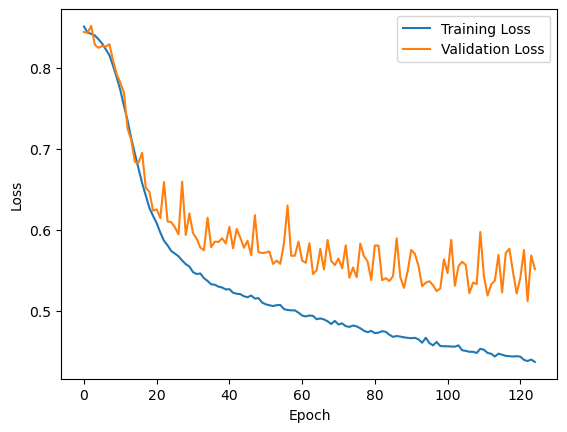

In [175]:
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [176]:
# Function to compute evaluation metrics
def evaluate_performance(model, dataloader):
    """
    Evaluate the performance of a recurrent neural network model on a given dataset.

    Args:
        model (torch.nn.Module): The trained recurrent neural network model.
        dataloader (torch.utils.data.DataLoader): The data loader for the evaluation dataset.

    Returns:
        accuracy (float): The accuracy of the model on the evaluation dataset.
        precision (float): The precision score of the model on the evaluation dataset.
        recall (float): The recall score of the model on the evaluation dataset.
        conf_matrix (numpy.ndarray): The confusion matrix of the model on the evaluation dataset.
        auroc (float): The area under the receiver operating characteristic curve (AUROC) of the model on the evaluation dataset.
    """
    
    model.eval()  # Set the model to evaluation mode
    total_correct = 0
    total_samples = 0
    predicted_labels = []
    true_labels = []
    all_probabilities = []
    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in dataloader:
            outputs = model(inputs)
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predicted = (probabilities > 0.5).int()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predicted_labels.extend(predicted.numpy())
            true_labels.extend(labels.numpy())
            all_probabilities.extend(probabilities.numpy())

    # Compute accuracy
    accuracy = total_correct / total_samples

    # Compute precision and recall
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # calculate false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(true_labels, all_probabilities)
    # Calculate AUROC
    auroc = roc_auc_score(true_labels, all_probabilities)

   
    # plot ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    #plt.show()

    return accuracy, precision, recall, conf_matrix, auroc

Test Performance:
Accuracy: 86.41%
AUROC: 0.88
Precision: 0.73
Recall: 0.69
Confusion Matrix:
[[504  44]
 [ 54 119]]


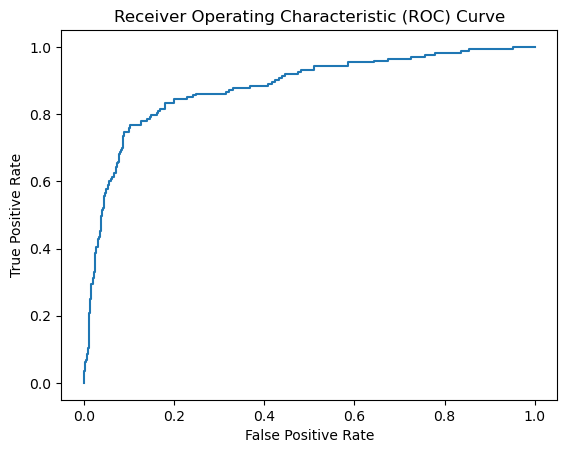

In [177]:
model = lstm # .load_state_dict(dir+'model.pth')
accuracy, precision, recall, conf_matrix, auroc =  evaluate_performance(model, test_dataloader_rnn)
print('Test Performance:') 
print(f'Accuracy: {accuracy:.2%}')
print(f'AUROC: {auroc:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


In [178]:
print(y)

subject_id
10000980    False
10006029     True
10010471    False
10014471    False
10017764    False
            ...  
19987216     True
19993603    False
19994588    False
19995320    False
19999303    False
Name: outcome, Length: 3609, dtype: bool


In [179]:
print(outputs)

tensor([[-5.3490],
        [-7.2825],
        [-2.4814],
        [ 0.1495],
        [-2.0410],
        [-2.4579],
        [-1.3072],
        [-1.4840],
        [-2.1964],
        [-2.7756]])


# Comparison

In [ ]:
predictions_feng = gradboost.predict(X_test_scaled)
probs_feng= gradboost.predict_proba(X_test_scaled)
#calculate accuracy of the model
accuracy_feng = sum(predictions_feng==y_test)/len(predictions_feng)
#calculate AUC of the model
auc_feng = roc_auc_score(y_test, predictions_feng)
#calculate precision of the model
precision_feng = precision_score(y_test, predictions_feng)
#calculate recall of the model
recall_feng = recall_score(y_test, predictions_feng)
#calculate f1 score of the model
f1_feng = f1_score(y_test, predictions_feng)
#calculate confusion matrix of the model
conf_feng = confusion_matrix(y_test, predictions_feng)


CNN metrics

In [ ]:
accuracy_cnn, precision_cnn, recall_cnn, conf_matrix_cnn, auroc_cnn = evaluate_performance(test_dataloader_1d)
print('Test Performance:') 
print(f'Accuracy: {accuracy_cnn:.2%}')
print(f'AUROC: {auroc_cnn:.2f}')
print(f'Precision: {precision_cnn:.2f}')
print(f'Recall: {recall_cnn:.2f}')
print('Confusion Matrix:')
print(conf_matrix_cnn)


In [ ]:
#accuracy_dict = {'TrendFeatures': accuracy_feng, 'CNN': accuracy_cnn}
precision_dict = {'TrendFeatures': precision_feng, 'CNN': precision_cnn}
recall_dict = {'TrendFeatures': recall_feng, 'CNN': recall_cnn}
f1_dict = {'TrendFeatures': f1_feng, 'CNN': f1_cnn}
auc_dict = {'TrendFeatures': auc_feng, 'CNN': auroc_cnn}

In [ ]:
results = pd.DataFrame([precision_dict, recall_dict, f1_dict, auc_dict], index=['Precision', 'Recall', 'F1', 'AUC'])

In [ ]:
results.pivot_table(columns=['Precision', 'Recall', 'F1', 'AUC'])

In [ ]:
total_correct = 0
total_samples = 0
predicted_labels = []
true_labels = []
all_probabilities = []
with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in test_dataloader_1d:
            outputs = cnn(inputs)
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predicted = (probabilities > 0.5).int()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predicted_labels.extend(predicted.numpy())
            true_labels.extend(labels.numpy())
            all_probabilities.extend(probabilities.numpy())

In [ ]:
f1_cnn = f1_score(true_labels, predicted_labels)

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve

# Calculate the FPR and TPR for the GradientBoostingClassifier model
fpr_gb, tpr_gb, _ = roc_curve(y_test, probs_feng[:,1])

# Calculate the FPR and TPR for the CNN model
fpr_cnn, tpr_cnn, _ = roc_curve(true_labels, all_probabilities)

# Plot the ROC curves
sns.lineplot(x=fpr_gb, y=tpr_gb, label='GradientBoostingClassifier')
sns.lineplot(x=fpr_cnn, y=tpr_cnn, label='CNN')

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
fis = pd.DataFrame.from_dict({'feature':X_train.columns, 'importances': gradboost.best_estimator_.feature_importances_})

In [ ]:
sns.barplot(fis, x='feature', y='importances')

In [ ]:
ranks = fis.sort_values(by='importances', ascending=False)
ranks['rank'] = range(1, len(ranks)+1)

In [ ]:
trend_features = ranks[ranks['feature'].str.contains('trend')]
print(trend_features.sort_values(by='rank', ascending=True))


In [ ]:
gradboost.best_params_

In [ ]:
current_df.head()

In [ ]:
new_X = current_df.drop(columns=['subject_id','outcome'])
new_X.fillna(0, inplace=True)
y = current_df['outcome']
#split as before
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42, stratify=y)
#scale as before
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)


In [ ]:
new_grad = gradboost.best_estimator_.fit(X_train_scaled, y_train)
new_preds = new_grad.predict(X_test_scaled)

In [ ]:
predictions_feng_new = new_grad.predict(X_test_scaled)
probs_feng_new= new_grad.predict_proba(X_test_scaled)
#calculate accuracy of the model
accuracy_feng_new = sum(predictions_feng_new==y_test)/len(predictions_feng_new)
#calculate AUC of the model
auc_feng_new = roc_auc_score(y_test, predictions_feng_new)
#calculate precision of the model
precision_feng_new = precision_score(y_test, predictions_feng_new)
#calculate recall of the model
recall_feng_new = recall_score(y_test, predictions_feng_new)
#calculate f1 score of the model
f1_feng_new = f1_score(y_test, predictions_feng_new)
#calculate confusion matrix of the model
conf_feng_new = confusion_matrix(y_test, predictions_feng_new)

In [ ]:
print('Test Performance:')     
print(f'Accuracy: {accuracy_feng_new:.2%}')
print(f'AUROC: {auc_feng_new:.2f}')
print(f'Precision: {precision_feng_new:.2f}')
print(f'Recall: {recall_feng_new:.2f}')
print('Confusion Matrix:')
print(conf_feng)


In [ ]:
25*7

In [ ]:
current_df

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
best_params = {'max_depth': 15,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 4,
 'n_estimators': 200}
model = GradientBoostingClassifier(**best_params)

# Cross-sectional Predictions by Time

In [ ]:
#window parameters
window_size = 3
window_ends = range(7, 365, window_size)

In [ ]:
aucs = []
precisions = []
recalls = []
counter = 0
for i in window_ends:
    counter +=1
    print('Window (',i+window_size,', ', -i,')', '    iteration: ', counter, ' of ', len(window_ends))
    current_df = fg.current_bloods_df(processed_labs, i, -i+7)
    current_df.fillna(0, inplace=True)
    X = current_df.drop(columns=['subject_id','outcome'])
    y = current_df['outcome']
    window_aucs = []
    window_precisions = []
    window_recalls = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for j, (train_data, test_data) in enumerate(kf.split(X, y)):

        #split as before
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        X_train = X.iloc[train_data]
        X_test = X.iloc[test_data]
        y_train = y.iloc[train_data]
        y_test = y.iloc[test_data]
        
        #scale as before
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        #fit as before
        model.fit(X_train_scaled, y_train)
        #predict as before
        predictions = model.predict(X_test_scaled)
        probabilities = model.predict_proba(X_test_scaled)
        #calculate AUC of the model
        auc = roc_auc_score(y_test, probabilities[:,1])
        #calculate precision of the model
        precision = precision_score(y_test, predictions)
        #calculate recall of the model
        recall = recall_score(y_test, predictions)
        window_aucs.append(auc)
        window_precisions.append(precision)
        window_recalls.append(recall)

    aucs.append(sum(window_aucs)/len(window_aucs))
    precisions.append(sum(window_precisions)/len(window_precisions))
    recalls.append(sum(window_recalls)/len(window_recalls))



# Cross-sectional predictions with just test indicators

In [ ]:
aucs_testind = []
precisions_testind = []
recalls_testind = []
counter = 0
for i in window_ends:
    counter +=1
    print('Window (',i+window_size,', ', -i,')', '    iteration: ', counter, ' of ', len(window_ends))
    current_df = fg.current_bloods_df(processed_labs, i, -i+7)
    current_df.fillna(0, inplace=True)
    X = current_df.drop(columns=['subject_id','outcome'])
    X[X>0] = 1
    y = current_df['outcome']
    window_aucs = []
    window_precisions = []
    window_recalls = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for j, (train_data, test_data) in enumerate(kf.split(X, y)):

        #split as before
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        X_train = X.iloc[train_data]
        X_test = X.iloc[test_data]
        y_train = y.iloc[train_data]
        y_test = y.iloc[test_data]
        
        #scale as before
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        #fit as before
        model.fit(X_train_scaled, y_train)
        #predict as before
        predictions = model.predict(X_test_scaled)
        probabilities = model.predict_proba(X_test_scaled)
        #calculate AUC of the model
        auc = roc_auc_score(y_test, probabilities[:,1])
        #calculate precision of the model
        precision = precision_score(y_test, predictions)
        #calculate recall of the model
        recall = recall_score(y_test, predictions)
        window_aucs.append(auc)
        window_precisions.append(precision)
        window_recalls.append(recall)

    aucs_testind.append(sum(window_aucs)/len(window_aucs))
    precisions_testind.append(sum(window_precisions)/len(window_precisions))
    recalls_testind.append(sum(window_recalls)/len(window_recalls))



In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
#Plot the AUCS against the time windows
ax1.plot(window_ends, aucs_testind, label='Indicator Only')
ax1.plot(window_ends, aucs, label='With Values')
ax1.set_xlabel('Time Window')
ax1.set_ylabel('AUC')
ax1.set_title('AUC vs Time Window')
ax1.legend()

#Plot the precisions against the time windows
ax2.plot(window_ends, precisions_testind, label='Indicator Only')
ax2.plot(window_ends, precisions, label='With Values')
ax2.set_xlabel('Time Window')
ax2.set_ylabel('Precision')
ax2.set_title('Precision vs Time Window')
ax2.legend()

#Plot the recalls against the time windows
ax3.plot(window_ends, recalls_testind, label='Indicator Only')
ax3.plot(window_ends, recalls, label='With Values')
ax3.set_xlabel('Time Window')
ax3.set_ylabel('Recall')
ax3.set_title('Recall vs Time Window')
ax3.legend()

In [ ]:
# fit a 2nd degree polynomial to each of the lines of the graphs above and plot the results
import numpy as np
from numpy.polynomial.polynomial import Polynomial

aucs_poly = Polynomial.fit(window_ends, aucs, 2)
precisions_poly = Polynomial.fit(window_ends, precisions, 2)
recalls_poly = Polynomial.fit(window_ends, recalls, 2)

aucs_testind_poly = Polynomial.fit(window_ends, aucs_testind, 2)
precisions_testind_poly = Polynomial.fit(window_ends, precisions_testind, 2)
recalls_testind_poly = Polynomial.fit(window_ends, recalls_testind, 2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
#Plot the AUCS against the time windows
ax1.plot(window_ends, aucs_testind, label='Indicator Only')
ax1.plot(window_ends, aucs, label='With Values')
ax1.plot(window_ends, aucs_poly(window_ends), label='Polynomial Fit')
ax1.plot(window_ends, aucs_testind_poly(window_ends), label='Polynomial Fit Indicator Only')
ax1.set_xlabel('Time Window')
ax1.set_ylabel('AUC')
ax1.set_title('AUC vs Time Window')
ax1.legend()

#Plot the precisions against the time windows
ax2.plot(window_ends, precisions_testind, label='Indicator Only')
ax2.plot(window_ends, precisions, label='With Values')
ax2.plot(window_ends, precisions_poly(window_ends), label='Polynomial Fit')
ax2.plot(window_ends, precisions_testind_poly(window_ends), label='Polynomial Fit Indicator Only')
ax2.set_xlabel('Time Window')
ax2.set_ylabel('Precision')
ax2.set_title('Precision vs Time Window')
ax2.legend()

#Plot the recalls against the time windows
ax3.plot(window_ends, recalls_testind, label='Indicator Only')
ax3.plot(window_ends, recalls, label='With Values')
ax3.plot(window_ends, recalls_poly(window_ends), label='Polynomial Fit')
ax3.plot(window_ends, recalls_testind_poly(window_ends), label='Polynomial Fit Indicator Only')
ax3.set_xlabel('Time Window')
ax3.set_ylabel('Recall')
ax3.set_title('Recall vs Time Window')
ax3.legend()


# Test CNN code

In [ ]:
from utils.CNN_1d import OneD_Dataset, onedCNN2, train_model, initialise_dataloaders

In [ ]:
train_loader, val_loader, test_loader = initialise_dataloaders(dir+'CNN_1d_input.npy', dir+'CNN_1d_output.npy', 48)

In [ ]:
dir

In [ ]:
model = onedCNN2()
train_model(model, train_loader, val_loader, 10)